# **TravelLens**

In [ ]:
import os
import cv2
import shutil
import numpy as np
from PIL import Image
from google.colab import files
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
!pip install flask

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Operation cancelled by user
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pip/_vendor/pkg_resources/__init__.py", line 3108, in _dep_map
    return self.__dep_map
  File "/usr/local/lib/python3.10/dist-packages/pip/_vendor/pkg_resources/__init__.py", line 2901, in __getattr__
    raise AttributeError(attr)
AttributeError: _DistInfoDistribution__dep_map

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/cli/base_command.py", line 169, in exc_logging_wrapper
    status = run_func(*args)
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/cli/req_command.py", line 242, in wrapper
    return func(self, options, args)
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/commands/install.py", line 441, in run
    confl

In [ ]:
print(tf.__version__)

2.12.0


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
dataset_path = "/content/drive/MyDrive/Bangkit 2023/Capstone Project/Bali/Bali Landmark 50 Set"

In [ ]:
os.listdir(dataset_path)

['Bedugul',
 'Monumen Bajra Sandi',
 'Patung Nakula Sadewa',
 'Ground Zero',
 'Vihara Dharma Giri',
 'Tanah Lot',
 'Garuda Wisnu Kencana',
 'Patung Dewa Ruci',
 'Patung Satria Gatotkaca']

In [ ]:
# Path ke folder tujuan untuk train set dan validation/test set
train_path = "./dataset/train"
val_test_path = "./dataset/test"

# Rasio pembagian train set dan validation/test set
test_size = 0.02

from sklearn.model_selection import train_test_split
import shutil

# Loop melalui setiap kelas dalam dataset
for class_name in os.listdir(dataset_path):
    class_path = os.path.join(dataset_path, class_name)
    if os.path.isdir(class_path):
        # Membuat folder tujuan untuk kelas pada train set dan validation/test set
        train_class_dir = os.path.join(train_path, class_name)
        os.makedirs(train_class_dir, exist_ok=True)
        val_test_class_dir = os.path.join(val_test_path, class_name)
        os.makedirs(val_test_class_dir, exist_ok=True)

        # Mendapatkan list semua file gambar dalam kelas
        image_files = [file for file in os.listdir(class_path) if file.endswith((".png", ".jpg", ".jpeg"))]

        # Memecah dataset menjadi train set dan validation/test set
        train_files, val_test_files = train_test_split(image_files, test_size=test_size, random_state=42)

        # Memindahkan file gambar ke folder tujuan
        for file in train_files:
            src = os.path.join(class_path, file)
            dst = os.path.join(train_class_dir, file)
            shutil.copyfile(src, dst)

        for file in val_test_files:
            src = os.path.join(class_path, file)
            dst = os.path.join(val_test_class_dir, file)
            shutil.copyfile(src, dst)

In [ ]:
# Konfigurasi dataset dan direktori
train_dir = train_path
test_dir = val_test_path
input_shape = (224, 224)
batch_size = 32
num_classes = 9

In [ ]:
# Preprocessing data
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=input_shape,
    batch_size=batch_size,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=input_shape,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

Found 4725 images belonging to 9 classes.
Found 99 images belonging to 9 classes.


In [ ]:
model = keras.Sequential([
    layers.Conv2D(16, (3,3), activation='relu', input_shape=(224, 224, 3)),
    layers.MaxPooling2D(),
    layers.Conv2D(32, (3,3), activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(512, (3,3), activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0,5),
    layers.Dense(9, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 26, 26, 64)       0

In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=15,
    validation_data=test_generator,
    validation_steps=len(test_generator)
)

Epoch 1/15
148/148 [==============================] - 29s 113ms/step - loss: 1.6754 - accuracy: 0.3856 - val_loss: 1.3283 - val_accuracy: 0.4343
Epoch 2/15
148/148 [==============================] - 15s 104ms/step - loss: 0.8294 - accuracy: 0.7236 - val_loss: 0.5250 - val_accuracy: 0.8586
Epoch 3/15
148/148 [==============================] - 15s 101ms/step - loss: 0.3929 - accuracy: 0.8669 - val_loss: 0.2667 - val_accuracy: 0.9596
Epoch 4/15
148/148 [==============================] - 15s 101ms/step - loss: 0.2309 - accuracy: 0.9221 - val_loss: 0.3199 - val_accuracy: 0.9192
Epoch 5/15
148/148 [==============================] - 15s 101ms/step - loss: 0.1107 - accuracy: 0.9638 - val_loss: 0.3304 - val_accuracy: 0.9293
Epoch 6/15
148/148 [==============================] - 15s 101ms/step - loss: 0.1203 - accuracy: 0.9625 - val_loss: 0.3056 - val_accuracy: 0.9394
Epoch 7/15
148/148 [==============================] - 15s 104ms/step - loss: 0.0707 - accuracy: 0.9774 - val_loss: 0.2827 - val_ac

In [ ]:
# Evaluasi model
test_loss, test_acc = model.evaluate(test_generator, verbose=2)
print('Test accuracy:', test_acc)

4/4 - 0s - loss: 0.3184 - accuracy: 0.9192 - 269ms/epoch - 67ms/step
Test accuracy: 0.9191918969154358


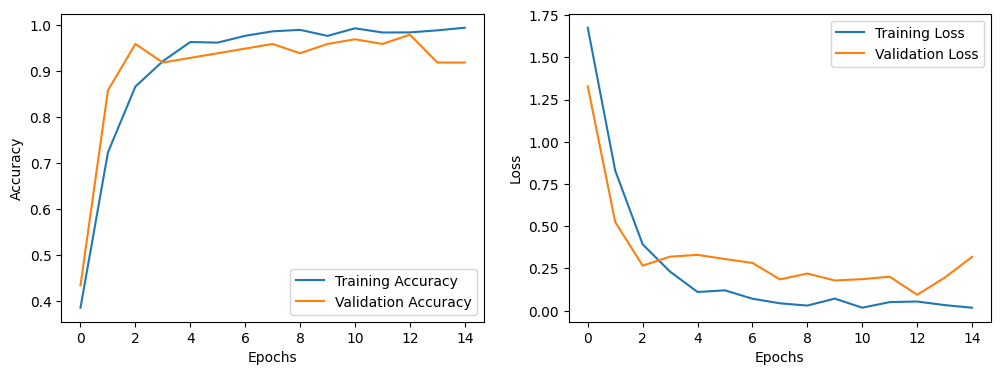

In [ ]:
import matplotlib.pyplot as plt

# Plot akurasi dan loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.show()

In [ ]:
# Meminta pengguna untuk mengunggah file
uploaded = files.upload()

for filename in uploaded.keys():
    loc = ('/content/' + filename)
    print(loc)

Saving 41.jpg to 41.jpg
/content/41.jpg


1/1 [==============================] - 0s 301ms/step
Prediksi: Bedugul
Kepercayaan: 0.9999999


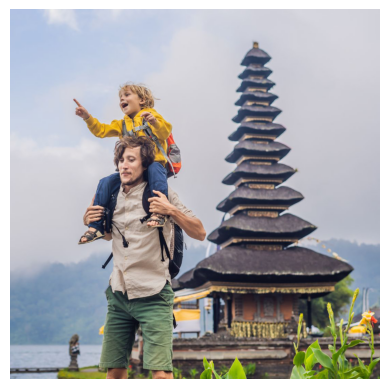

In [ ]:
# # Fungsi untuk memuat gambar dari URL atau direktori file
def load_image(path):
    img = Image.open(path)
    img = img.resize((224,224))
    img = np.array(img) / 255.0
    img = np.expand_dims(img, axis=0)
    return img

# path gambar yang ingin diprediksi
image_path = loc

# Load dan preproses gambar
image = load_image(image_path)
# Atau: image = load_image(image_path)

# Melakukan prediksi
predictions = model.predict(image)
predicted_class = np.argmax(predictions[0])
confidence = predictions[0][predicted_class]

# Label kelas yang sesuai dengan prediksi
class_labels = ['Bedugul','Garuda Wisnu Kencana','Ground Zero','Monumen Bajra Sandi','Patung Dewa Ruci','Patung Nakula Sadewa','Patung Satria Gatotkaca','Tanah Lot', 'Vihara Dharma Giri']
predicted_label = class_labels[predicted_class]

print('Prediksi:', predicted_label)
print('Kepercayaan:', confidence)

img = mpimg.imread(loc)
plt.imshow(img)
plt.axis('off')
plt.show()

In [ ]:
# Meminta pengguna untuk mengunggah file
uploaded = files.upload()

for filename in uploaded.keys():
    loc = ('/content/' + filename)
    print(loc)

Saving images (27).jpg to images (27).jpg
/content/images (27).jpg


1/1 [==============================] - 0s 18ms/step
Prediksi: Monumen Bajra Sandi
Kepercayaan: 0.99922836


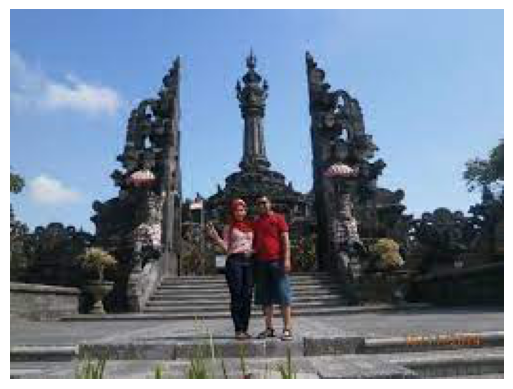

In [ ]:
# # Fungsi untuk memuat gambar dari URL atau direktori file
def load_image(path):
    img = Image.open(path)
    img = img.resize((224,224))
    img = np.array(img) / 255.0
    img = np.expand_dims(img, axis=0)
    return img

# path gambar yang ingin diprediksi
image_path = loc

# Load dan preproses gambar
image = load_image(image_path)
# Atau: image = load_image(image_path)

# Melakukan prediksi
predictions = model.predict(image)
predicted_class = np.argmax(predictions[0])
confidence = predictions[0][predicted_class]

# Label kelas yang sesuai dengan prediksi
class_labels = ['Bedugul','Garuda Wisnu Kencana','Ground Zero','Monumen Bajra Sandi','Patung Dewa Ruci','Patung Nakula Sadewa','Patung Satria Gatotkaca','Tanah Lot', 'Vihara Dharma Giri']
predicted_label = class_labels[predicted_class]

print('Prediksi:', predicted_label)
print('Kepercayaan:', confidence)

img = mpimg.imread(loc)
plt.imshow(img)
plt.axis('off')
plt.show()

In [ ]:
# def predict_image(img):
#  img_4d=img.reshape(-1,224,224,3)
#  prediksi=model.predict(img_4d)[0]
#  class_names = ['Ground Zero','Garuda Wisnu Kencana', 'Patung Satria Gatotkaca','Monumen Bajra Sandi','Bedugul','Patung Nakula Sadewa','Patung Dewa Ruci','Vihara Dharma Giri','Tanah Lot']
#  return {class_names[i]: float(prediksi[i]) for i in range(3)}

In [ ]:
# image = fl.inputs.Image(shape=(224,224), image_mode='RGB', invert_colors=False, source="upload")
# label = fl.outputs.Label(num_top_classes=3)
# gr.Interface(fn=predict_image, inputs=image, outputs=label, interpretation='default').launch(debug='True')

In [ ]:
#Simpan model akhir
model.save("/content/drive/MyDrive/Bangkit 2023/h5/TravelLens_update.h5")
tf.keras.models.save_model(model,'/content/drive/MyDrive/Bangkit 2023/h5/TravelLens_update.hdf5')

In [ ]:
#Simpan juga model akhir dalam bentuk json
model_json = model.to_json()
with open("/content/drive/MyDrive/Bangkit 2023/h5/model_json_update.json", "w") as file_json:
    file_json.write(model_json)

In [ ]:
#Convert ke TF Lite
import tensorflow as tf

#Load model yang telah disimpan
final_model = tf.keras.models.load_model(filepath="/content/drive/MyDrive/Bangkit 2023/h5/TravelLens_update.h5")

In [ ]:
#Convert model tsb ke bentuk TF Lite
conversion = tf.lite.TFLiteConverter.from_keras_model(final_model)
model_tflite = conversion.convert()

In [ ]:
#Simpan TF Lite model.
with tf.io.gfile.GFile('/content/drive/MyDrive/Bangkit 2023/h5/TravelLens_update.tflite', 'wb') as f:
  f.write(model_tflite)

In [ ]:
# menentukan direktori tujuan untuk menyimpan model
saved_model_dir = '/content/drive/MyDrive/Bangkit 2023/h5/model_cnn_TravelLens'

# Simpan model dalam format SavedModel
tf.saved_model.save(model, saved_model_dir)

In [ ]:
from numpy import argmax
from tensorflow.nn import softmax
from tensorflow.python.ops.gen_array_ops import expand_dims
from keras.utils.image_utils import img_to_array
import keras
from PIL import Image
# from tensorflow.keras.utils import Image
import numpy as np

# Path ke file model H5
model_path = '/content/drive/MyDrive/Bangkit 2023/h5/TravelLens_update.h5'

# Load model dari file H5
model = keras.models.load_model(model_path)

# Contoh penggunaan model
input_data = '/content/dataset/test/Patung Satria Gatotkaca/aug_0_52.jpg'  # Isi dengan data masukan Anda sebagai array NumPy
img = Image.open(input_data)
img = img.resize((224,224))
img_array = img_to_array(img)
img_array = expand_dims(img, 0)

pred = model.predict(img_array)
score = softmax(pred[0])

# Lakukan sesuatu dengan output model
labels = list(train_generator.class_indices.keys())
predicted_index = np.argmax(score)
predicted_label = labels[predicted_index]
print(predicted_label)

1/1 [==============================] - 0s 102ms/step
Patung Satria Gatotkaca


In [ ]:
metadata = {
    "Date created" : "June 16, 2023"
    "dataset": "Bali Landmark",
    "task" : "detect"
    "input shape": [224, 224],
    "batch size": 32,
    "num classes": 9,
    "class_labels": [
        "Bedugul",
        "Garuda Wisnu Kencana",
        "Ground Zero",
        "Monumen Bajra Sandi",
        "Patung Dewa Ruci",
        "Patung Nakula Sadewa",
        "Patung Satria Gatotkaca",
        "Tanah Lot",
        "Vihara Dharma Giri"
    ]
}

SyntaxError: ignored

In [ ]:
import google.colab
print(google.colab.__version__)

0.0.1a2


In [ ]:
import sys
print(sys.version)


3.10.11 (main, Apr  5 2023, 14:15:10) [GCC 9.4.0]


In [ ]:
import google.colab
print(google.colab.sys_info())


AttributeError: ignored